# Augmentation
* 기존 이미지에 추가적인 특징들을 부여하는 것
* 좌우를 반전 한다거나, 스케일을 늘렸다가 줄인다거나, 각도를 약간 회전시킨다거나 등등...

# 이미지 불러오기

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_train = X_train[..., tf.newaxis]
X_train.shape

(60000, 28, 28, 1)

In [ ]:
image = X_train[0]
image.shape

(28, 28, 1)

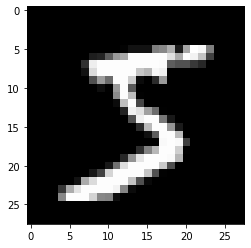

In [ ]:
plt.imshow(image[..., 0], 'gray')
plt.show()

# ImageDataGenerator 사용하기
이미지에 Augmentation을 넣기위한 클래스. `ImageDataGenerator` 클래스의 객체를 만들어 놓고, 이미지를 `ImageDataGenerator`에 흘려주는(flow) 방식

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Augmentation 설정
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip=True # 좌우 반전
)

Augmentation을 주기 위해서는 데이터의 형식을 CNN 레이어에 들어가는 형식으로 맞춰 줘야 합니다. `(N, H, W, C)`유지

In [ ]:
X_train.shape

(60000, 28, 28, 1)

이미지 한장만 augmentation 하기!

In [ ]:
inputs = X_train[0]
inputs.shape

(28, 28, 1)

In [ ]:
inputs = inputs[tf.newaxis, ...]
inputs.shape

(1, 28, 28, 1)

ImageDataGenerator에 이미지 흘리기(flow)

In [ ]:
datagen.flow(inputs)

Iterator를 강제로 움직여서 Augmentation된 이미지를 꺼내보기

In [ ]:
img_iterator = datagen.flow(inputs)
image = next(iter(img_iterator))

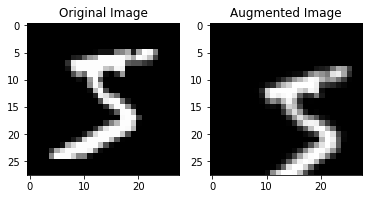

In [ ]:
plt.subplot(121)
plt.imshow(np.squeeze(inputs), 'gray')
plt.title("Original Image")

plt.subplot(122)
plt.imshow(np.squeeze(image), 'gray')
plt.title("Augmented Image")

plt.show()

# ImageDataGenerator의 변형 옵션

* width_shift_range : 좌우 이동 범위 설정
* height_shift_range : 상하 이동 범위 설정
* brightness_range : 밝기 조절 설정
* zoom_range : 확대 / 축소 범위 설정
* horizontal_flip : 좌우반전 여부( bool )
* vertical_flip : 상하반전 여부( bool )
* **rescale : 픽셀 전처리 단위 설정**
* preprocessing_function : opencv 등 외부 라이브러리를 이용한 전처리 할 때 사용

## Rescale 시 주의 사항
`train_data_gen`에 rescale을 했으면, `test_data_gen`에도 **반드시** rescale이 되어야 한다.

In [ ]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale = 1. / 255. # 픽셀 단위를 1/255로 하겠다.
)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255. # train_datagen과 똑같은 rescale 옵션을 넣어줄 것!
)